In [1]:
#Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
#importing the dataset

train = pd.read_csv(r"C:\Users\sebin\Desktop\TCS project\salarydata.csv.xls")

In [4]:
# checking details of the dataset

In [5]:
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.shape

(32561, 14)

In [7]:
train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
train.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
train["native-country"].value_counts().index[0]

'United-States'

In [11]:
train["salary"].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

# data preprocessing

In [12]:
# Dropping the column 'education' as the column 'education-num' contains the same data but in numerical form.

In [13]:
train.drop('education', inplace=True, axis=1)

In [14]:
# Checking for null values
train.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [15]:
# removing duplicates 

In [16]:
# check duplicates and remove it
print("Before removing duplicates:", train.duplicated().sum())

train = train[~train.duplicated()]

print("After removing duplicates:", train.duplicated().sum())

Before removing duplicates: 3465
After removing duplicates: 0


In [17]:
# Replacing '?' 

In [18]:
col_names = train.columns

In [19]:
for c in col_names: 
    train = train.replace("?", np.NaN) 
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
categorical_columns_with_null = ['workclass','occupation','native-country']
for col in categorical_columns_with_null:
    train[col] = train[col].fillna(train[col].mode()[0])

In [21]:
# Numerical features


num_feature = [features for features in train.columns if train[features].dtypes!="O" and features !='Loan_Status']
num_feature

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

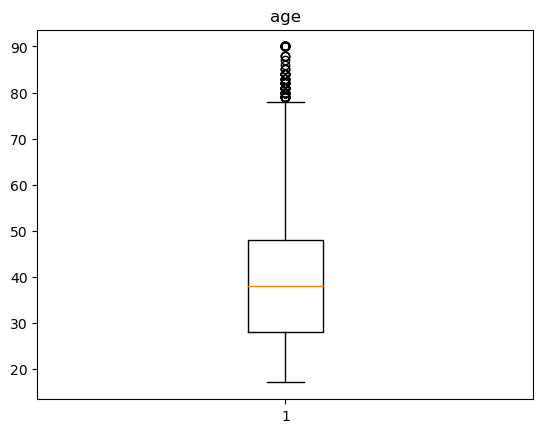

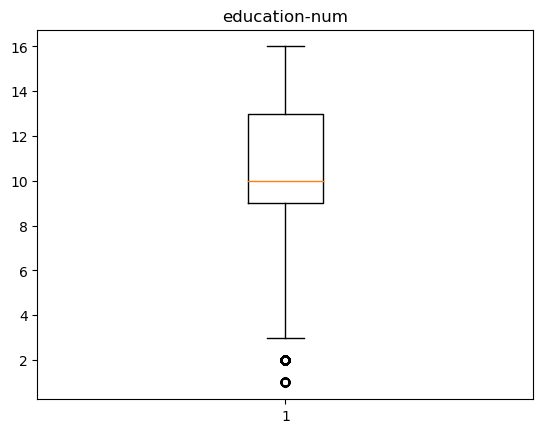

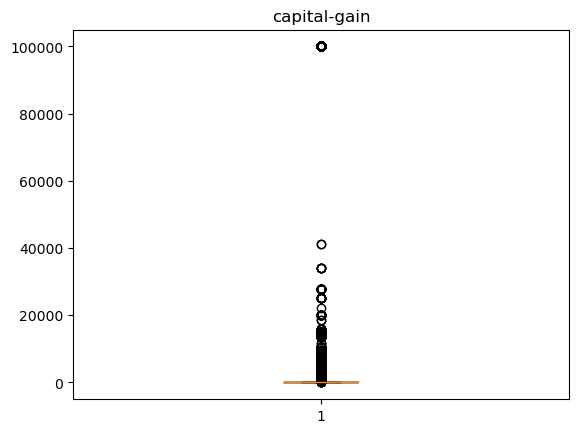

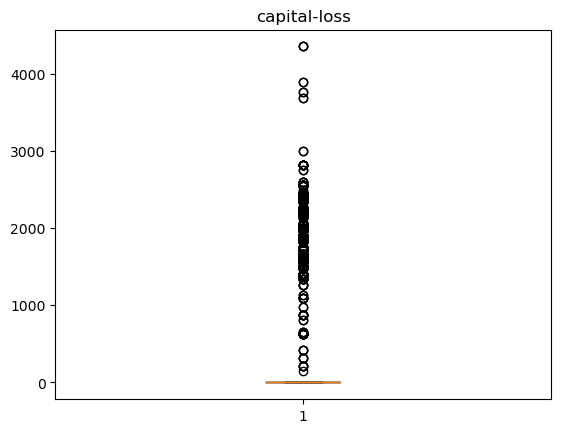

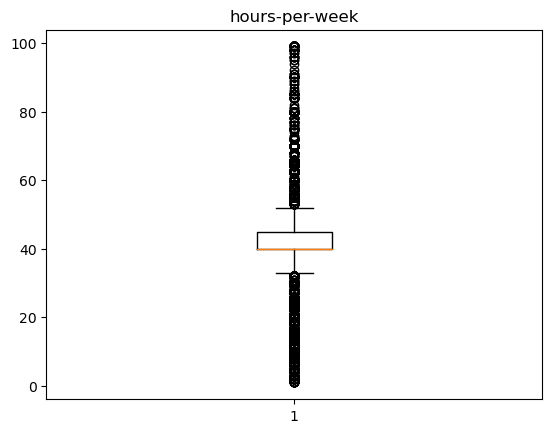

In [22]:
for i in num_feature:
    plt.boxplot(train[i])
    plt.title(i)
    plt.show()

There are outliers present in the numerical features of the dataset but we're not dropping the rows with outliers

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030144,0.074310,0.049570,0.039831
education-num,0.030144,1.000000,0.124182,0.080259,0.141446
capital-gain,0.074310,0.124182,1.000000,-0.035294,0.077704
capital-loss,0.049570,0.080259,-0.035294,1.000000,0.051636
hours-per-week,0.039831,0.141446,0.077704,0.051636,1.000000


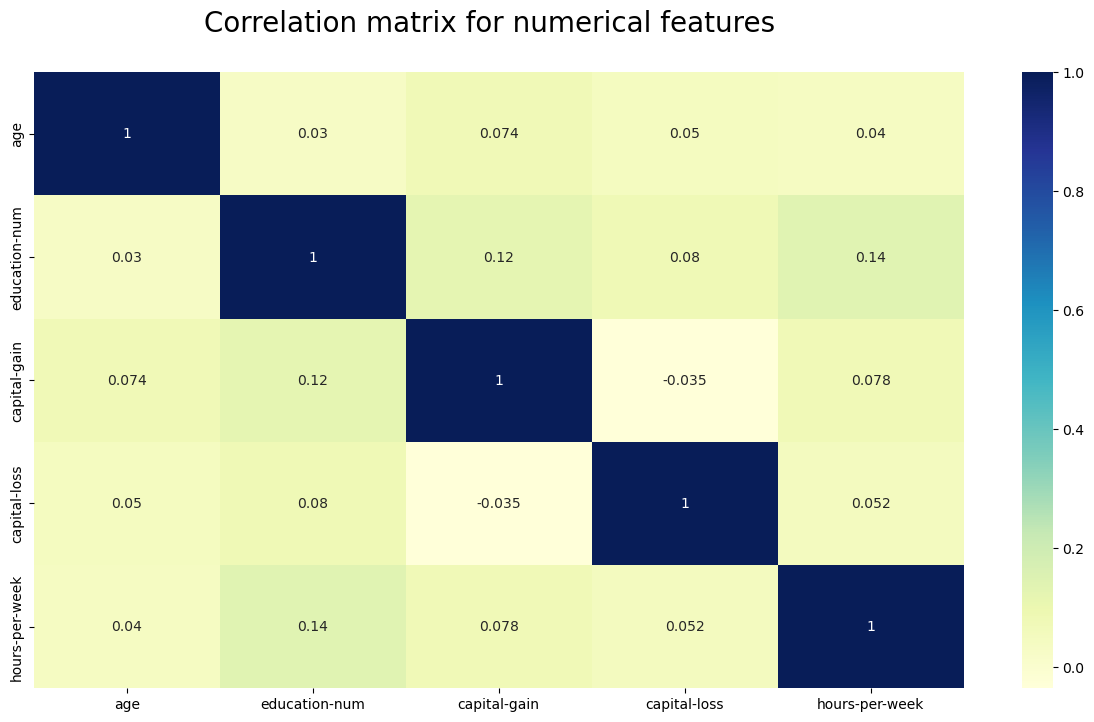

In [23]:
# Heatmap to find any high correlations
corrmatrix = train.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

In [24]:
# Encoding the data

category_col =['workclass','marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'native-country', 'salary']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    train[col] = labelEncoder.fit_transform(train[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}, 'marital-status': {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'race': {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}, 'sex': {'Female': 0, 'Male': 1}, 'native-country': {'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, 'Dominican-Republic': 5, 'Ecuador': 6, 'E

In [25]:
# Splitting target and independent features

X = train.drop('salary',axis=1)
Y = train['salary']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(X_train, y_train)
y_pred_rf  = rf_model.predict(X_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rf))  
print(accuracy_score(y_test, y_pred_rf))

[[5006  475]
 [ 743 1050]]
0.8325543029969755


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg    = LogisticRegression()
model_log  = log_reg.fit(X_train ,y_train)
y_pred_log = model_log.predict(X_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_log)) 
print(accuracy_score(y_test, y_pred_log))

[[5135  346]
 [1118  675]]
0.7987352213362662


C:\Users\sebin\anaconda3laatest\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier 

dt         = DecisionTreeClassifier(random_state = 42)
dt_model   = dt.fit(X_train, y_train)
y_pred_dt  = dt_model.predict(X_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_dt))   
print(accuracy_score(y_test, y_pred_dt))

[[4730  751]
 [ 774 1019]]
0.7903491888919439


Based on train data, on comparing the accuracy of each model:
    
    Logistic regression = 79.87%
    
    Decision tree = 79.03%
    
    Random Forest = 83.25%
    
From the above observation, RANDOM FOREST has the highest accuracy thus it 
can be considered as the best model to classify the data.